<img  src="https://courses.ut.edu.vn/pluginfile.php/1/theme_edly/main_logo/1733131096/logo_uth.png" alt="Mô tả hình ảnh" width="500" style="display: block; margin: auto;">

<div style="text-align: center; font-size: 25px;">
    <span>
        <strong>[010412204101] - Khai thác dữ liệu</strong>
    </span><br>
    <span>
        <strong>Nguyễn Huy Toàn - 22H1120071 - CN22CLCC</strong>
    </span><br>
    <p>
        <strong>Bài tập 4.2</strong>
    </p>
</div>

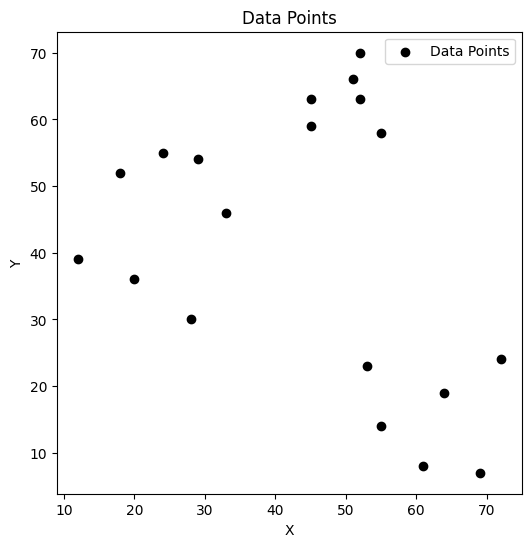

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Tạo dữ liệu mẫu
data = {
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
}
df = pd.DataFrame(data)

# Hiển thị dữ liệu ban đầu
plt.figure(figsize=(6, 6))
plt.scatter(df['x'], df['y'], c='black', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points')
plt.legend()
plt.show()


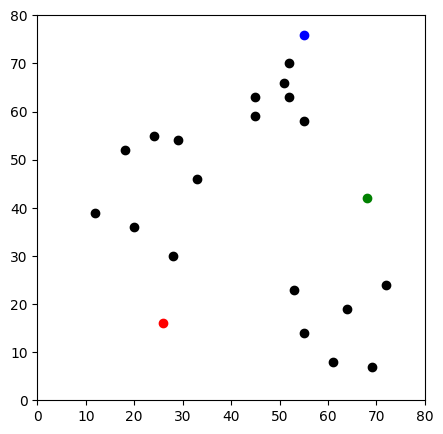

In [2]:
np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

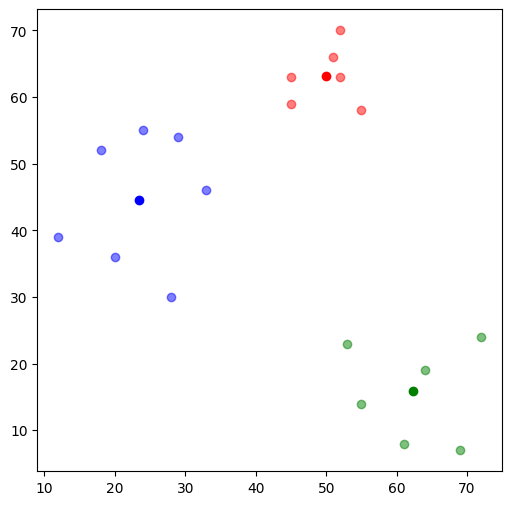

In [10]:
# Khởi tạo KMeans với số cụm K = 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)

# Lấy nhãn cụm và centroid
labels = kmeans.labels_  # Nhãn của từng điểm
centroids = kmeans.cluster_centers_  # Tọa độ của các centroid

# Hiển thị kết quả bước đầu
plt.figure(figsize=(6, 6))
colors = ['r', 'g', 'b']  # Màu sắc cho từng cụm
for i in range(k):
    cluster = df[labels == i]
    plt.scatter(cluster['x'], cluster['y'], c=colors[i], alpha=0.5)

# Vẽ các centroid
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, c=colors[idx])

plt.show()

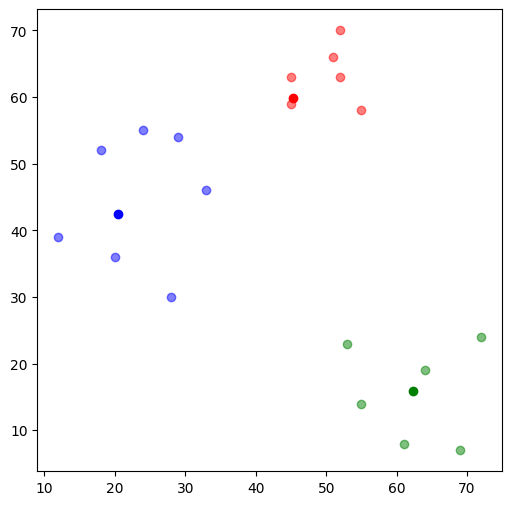

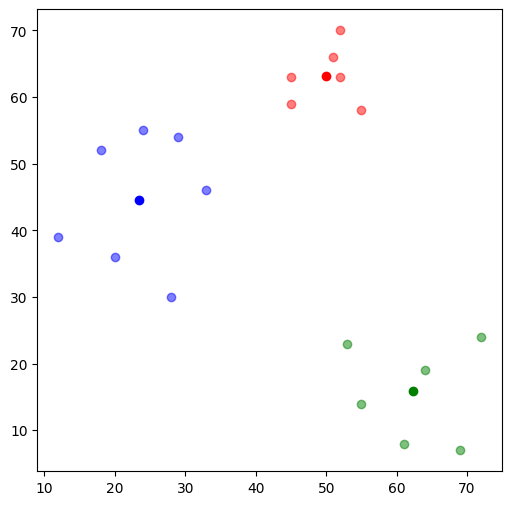

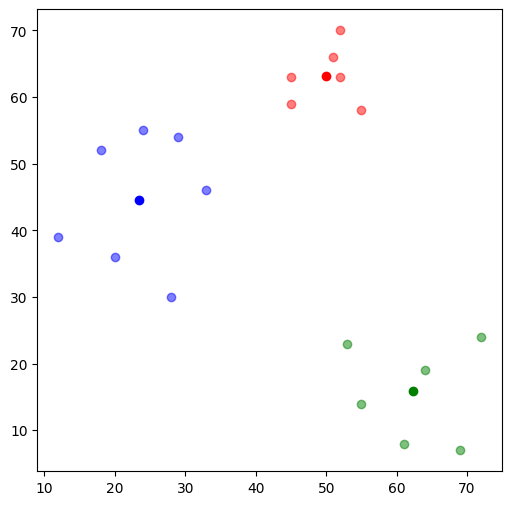

In [12]:
# Ghi lại centroid ban đầu
initial_centroids = kmeans.cluster_centers_

# Minh họa sự thay đổi qua từng bước lặp
for iteration in range(1, 4):  # Hiển thị 3 bước lặp đầu tiên
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=iteration, n_init=1)
    kmeans.fit(df)
    
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    plt.figure(figsize=(6, 6))
    for i in range(k):
        cluster = df[labels == i]
        plt.scatter(cluster['x'], cluster['y'], c=colors[i], alpha=0.5)

    # Vẽ các centroid
    for idx, centroid in enumerate(centroids):
        plt.scatter(*centroid, c=colors[idx])
    
    plt.show()


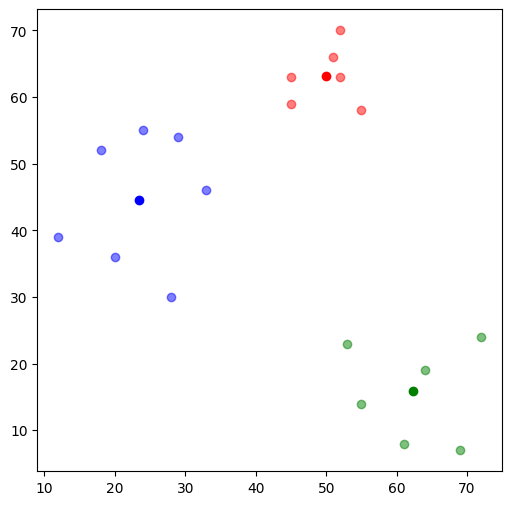

In [13]:
# Áp dụng KMeans và hội tụ đến kết quả cuối cùng
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)

# Lấy nhãn và centroid
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Hiển thị kết quả cuối
plt.figure(figsize=(6, 6))
for i in range(k):
    cluster = df[labels == i]
    plt.scatter(cluster['x'], cluster['y'], c=colors[i], alpha=0.5)

# Vẽ các centroid
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, c=colors[idx])

plt.show()
